# Monthly Prediction Approach Using A Function with A Linear and Sinusoidal Component

The function linear_sin_model(x, a, b, c, d, e, f) defines a model that combines:

- A linear trend: (a ⋅ x + b)

- A sinusoidal component: 𝑑 ⋅ sin(2𝜋( 𝑒 ⋅ 𝑥 + 𝑓))

The c coefficient acts as a constant offset added to the model. This model helps capture both a general upward/downward trend and periodic oscillations in the data (e.g., seasonal patterns).

The fit_gas_prices function fits the above model to the gas price data:

1. Normalizing the dates: Dates are normalized to start from zero, so calculations are relative to the first date.
2. Curve fitting: Uses scipy.optimize.curve_fit to find the best-fit coefficients (a,b,c,d,e,f) that minimize the difference between the model predictions and actual gas prices.


In [1]:
from scipy.optimize import curve_fit
import numpy as np

def linear_sin_model(x, a, b, c, d, e, f):
    return a*x + b + d*np.sin(2*np.pi*(e*x + f)) + c

def fit_gas_prices(dates, prices):
    # Normalize the dates to start from 0
    start_date = min(dates)
    normalized_dates = np.array(dates) - start_date

    # Perform curve fitting to obtain the model coefficients
    coeffs, _ = curve_fit(linear_sin_model, normalized_dates, prices)

    # Unpack the coefficients
    a, b, c, d, e, f = coeffs

    # Create and return the prediction function
    def predict_gas_price(date):
        # Normalize the input date
        normalized_date = date - start_date

        # Return historical price if within range, otherwise predict
        if 0 <= normalized_date <= 47:
            index = np.where(normalized_dates == normalized_date)[0]
            if index.size > 0:  # Ensure the index exists
                return prices[index[0]]  # Return the corresponding historical price
            else:
                raise ValueError("Date not found in historical data.")
        else:
            # Use the model to predict gas price for the given date
            return linear_sin_model(normalized_date, a, b, c, d, e, f)

    return predict_gas_price

Predicting Future Prices

In [2]:
def months_since_start(start_month, start_year, end_month, end_year):
    """
    Calculate the number of months between a start date and an end date.
    """
    # Calculate the total months for the start and end dates
    start_total_months = start_year * 12 + start_month
    end_total_months = end_year * 12 + end_month

    # Difference between the two
    return end_total_months - start_total_months


start_month = 10  # October
start_year = 2020
end_month = 7  # July
end_year = 2025

# Calculate the number of months
months_difference = months_since_start(start_month, start_year, end_month, end_year)
print(f"Number of months between {start_month}/{start_year} and {end_month}/{end_year}: {months_difference}")

Number of months between 10/2020 and 7/2025: 57


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("Nat_Gas.csv")

# Gas price data
dates = np.arange(48) # generates a sequence of indices for each month in the dataset (assuming 48 months of data).
gas_prices = df['Prices'] # Extracting the gas prices from the dataframe

# Fit the data and obtain the prediction function
predict_gas_price = fit_gas_prices(dates, gas_prices)

specific_date = 57 # July, 2025
predict_gas_price = predict_gas_price(specific_date)
print(f"Predicted gas price for {end_month}/{end_year} is ${round(predict_gas_price,2)}")

Predicted gas price for 7/2025 is $12.04


Notice that with the simple linear regression model the answer was $12.25, which is not too far from this model's prediction, $12.04

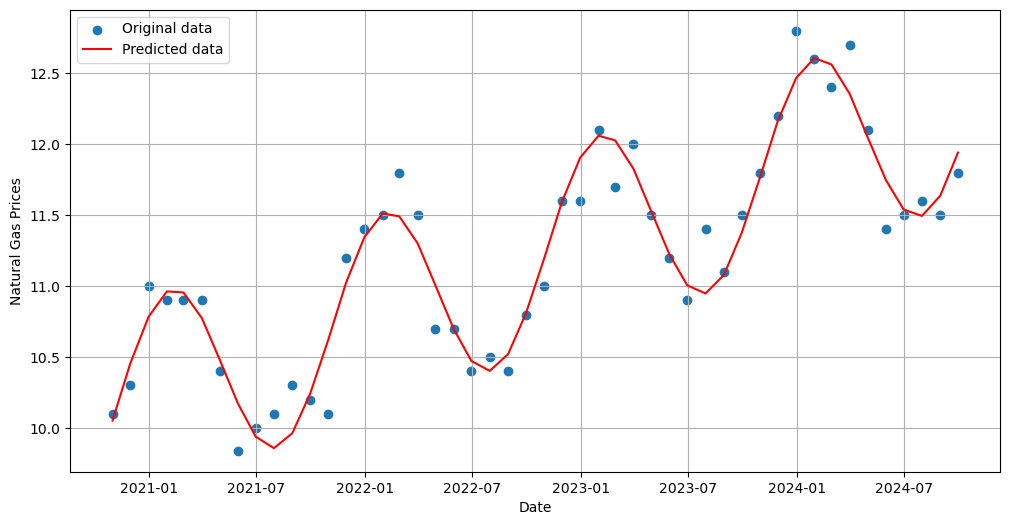

In [29]:
# Plot the original data and the prediction
predict_gas_price = fit_gas_prices(dates, gas_prices)
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
plt.figure(figsize=(12,6))
plt.scatter(df['Dates'], gas_prices, label='Original data')
plt.plot(df['Dates'], predict_gas_price(np.array(dates)), color = 'red', label='Predicted data')
plt.xlabel('Date')
plt.ylabel('Natural Gas Prices')
plt.legend()
plt.grid(True)
plt.show()